In [51]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from tqdm import tqdm 
import glob

C:\Users\scanimage\AppData\Local\Temp\ipykernel_10884\919602113.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [52]:
data_directory = r'F:\\JJM\\miniscope_analysis\\mGluR5_NAM\\clustering_analysis\\all_frames_2023-02-24-16-33-41_analysisOutput\\'

In [53]:
session_list = ['DIO_r2.7_15_20_30', 'DIO_r2.7_15_51_07',
                   'DIO_r2.8_16_45_11', 'DIO_r2.8_17_16_03',
                   'DIO_r2.14_17_25_26', 'DIO_r2.14_17_40_46', 'DIO_r2.14_18_11_01',
                    #'DIO_r2.19_13_45_01', 'DIO_r2.19_14_15_20',
                    'DIO_r2.7_17_00_12', 'DIO_r2.7_17_30_50',
                   'DIO_r2.8_16_00_28', 'DIO_r2.8_16_30_39', 
                   'DIO_r2.14_14_00_13', 'DIO_r2.14_14_30_28',
                   #'DIO_r2.19_16_04_27', 'DIO_r2.19_16_34_31'
               ] ;

In [54]:
#signalPeaks = pd.read_csv(data_directory+session+'_signalPeaks.csv')

In [55]:
def getEventRateForAnimals(signalPeaks):
    cell_dict = {}
    for cell in range(0, signalPeaks.shape[0]):
        #calculate event rates for each cell
        cell_peaks = np.where(signalPeaks.loc[cell]==1)[0]
        event_rate = np.zeros(signalPeaks.shape[1]-5)
        #sampling rate is 5Hz so 5 samples is 1 sec 
        for sIdx in range(0, signalPeaks.shape[1]-5):
            windowIdxs = (sIdx, sIdx+5)
            num_peaks = ((windowIdxs[0] < cell_peaks) & (cell_peaks < windowIdxs[1])).sum()
            event_rate[sIdx] = num_peaks
        cell_dict[cell] = event_rate
    eventRatePerCell_ = pd.DataFrame(cell_dict)
    eventRatePerCell = eventRatePerCell_.transpose()    
    return(eventRatePerCell)

In [56]:
#data_directory
#session='DIO_r2.7_15_20_30'
#glob.glob(data_directory+'*'+ session+'_signalPeaks.csv')

In [57]:
sessionDfsDict = {}
for session in tqdm(session_list):
    print(session)
    print(glob.glob(data_directory+ '*'+ session+'_signalPeaks.csv'))
    fmatch = glob.glob(data_directory+ '*'+ session+'_signalPeaks.csv')[0]
    signalPeaksSession = pd.read_csv(fmatch)
    sessionEventRate = getEventRateForAnimals(signalPeaksSession)
    sessionDfsDict[session] = sessionEventRate

  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

DIO_r2.7_15_20_30
['F:\\\\JJM\\\\miniscope_analysis\\\\mGluR5_NAM\\\\clustering_analysis\\\\all_frames_2023-02-24-16-33-41_analysisOutput\\Vehicle_DIO_r2.7_15_20_30_signalPeaks.csv']


  8%|██████▍                                                                            | 1/13 [00:04<00:55,  4.66s/it]

DIO_r2.7_15_51_07
['F:\\\\JJM\\\\miniscope_analysis\\\\mGluR5_NAM\\\\clustering_analysis\\\\all_frames_2023-02-24-16-33-41_analysisOutput\\Vehicle_DIO_r2.7_15_51_07_signalPeaks.csv']


 15%|████████████▊                                                                      | 2/13 [00:07<00:39,  3.58s/it]

DIO_r2.8_16_45_11
['F:\\\\JJM\\\\miniscope_analysis\\\\mGluR5_NAM\\\\clustering_analysis\\\\all_frames_2023-02-24-16-33-41_analysisOutput\\Vehicle_DIO_r2.8_16_45_11_signalPeaks.csv']


 23%|███████████████████▏                                                               | 3/13 [00:09<00:30,  3.01s/it]

DIO_r2.8_17_16_03
['F:\\\\JJM\\\\miniscope_analysis\\\\mGluR5_NAM\\\\clustering_analysis\\\\all_frames_2023-02-24-16-33-41_analysisOutput\\Vehicle_DIO_r2.8_17_16_03_signalPeaks.csv']


 31%|█████████████████████████▌                                                         | 4/13 [00:11<00:21,  2.35s/it]

DIO_r2.14_17_25_26
['F:\\\\JJM\\\\miniscope_analysis\\\\mGluR5_NAM\\\\clustering_analysis\\\\all_frames_2023-02-24-16-33-41_analysisOutput\\Vehicle_DIO_r2.14_17_25_26_signalPeaks.csv']


 38%|███████████████████████████████▉                                                   | 5/13 [00:12<00:16,  2.01s/it]

DIO_r2.14_17_40_46
['F:\\\\JJM\\\\miniscope_analysis\\\\mGluR5_NAM\\\\clustering_analysis\\\\all_frames_2023-02-24-16-33-41_analysisOutput\\Vehicle_DIO_r2.14_17_40_46_signalPeaks.csv']


 46%|██████████████████████████████████████▎                                            | 6/13 [00:14<00:14,  2.06s/it]

DIO_r2.14_18_11_01
['F:\\\\JJM\\\\miniscope_analysis\\\\mGluR5_NAM\\\\clustering_analysis\\\\all_frames_2023-02-24-16-33-41_analysisOutput\\Vehicle_DIO_r2.14_18_11_01_signalPeaks.csv']


 54%|████████████████████████████████████████████▋                                      | 7/13 [00:15<00:10,  1.81s/it]

DIO_r2.7_17_00_12
['F:\\\\JJM\\\\miniscope_analysis\\\\mGluR5_NAM\\\\clustering_analysis\\\\all_frames_2023-02-24-16-33-41_analysisOutput\\Fenobam_DIO_r2.7_17_00_12_signalPeaks.csv']


 62%|███████████████████████████████████████████████████                                | 8/13 [00:21<00:14,  2.88s/it]

DIO_r2.7_17_30_50
['F:\\\\JJM\\\\miniscope_analysis\\\\mGluR5_NAM\\\\clustering_analysis\\\\all_frames_2023-02-24-16-33-41_analysisOutput\\Fenobam_DIO_r2.7_17_30_50_signalPeaks.csv']


 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [00:23<00:10,  2.72s/it]

DIO_r2.8_16_00_28
['F:\\\\JJM\\\\miniscope_analysis\\\\mGluR5_NAM\\\\clustering_analysis\\\\all_frames_2023-02-24-16-33-41_analysisOutput\\Fenobam_DIO_r2.8_16_00_28_signalPeaks.csv']


 77%|███████████████████████████████████████████████████████████████                   | 10/13 [00:26<00:07,  2.65s/it]

DIO_r2.8_16_30_39
['F:\\\\JJM\\\\miniscope_analysis\\\\mGluR5_NAM\\\\clustering_analysis\\\\all_frames_2023-02-24-16-33-41_analysisOutput\\Fenobam_DIO_r2.8_16_30_39_signalPeaks.csv']


 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [00:28<00:04,  2.49s/it]

DIO_r2.14_14_00_13
['F:\\\\JJM\\\\miniscope_analysis\\\\mGluR5_NAM\\\\clustering_analysis\\\\all_frames_2023-02-24-16-33-41_analysisOutput\\Fenobam_DIO_r2.14_14_00_13_signalPeaks.csv']


 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [00:33<00:03,  3.46s/it]

DIO_r2.14_14_30_28
['F:\\\\JJM\\\\miniscope_analysis\\\\mGluR5_NAM\\\\clustering_analysis\\\\all_frames_2023-02-24-16-33-41_analysisOutput\\Fenobam_DIO_r2.14_14_30_28_signalPeaks.csv']


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:34<00:00,  2.65s/it]


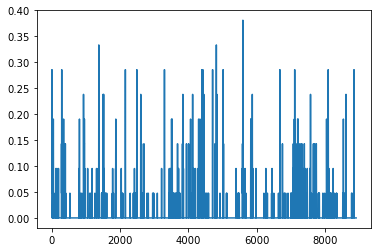

In [58]:
plt.plot(sessionDfsDict['DIO_r2.8_16_45_11'].mean(axis=0))

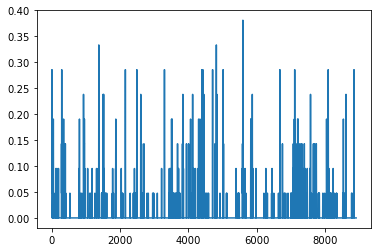

In [59]:
plt.plot(sessionDfsDict['DIO_r2.8_16_45_11'].mean(axis=0))

In [60]:
sessionDfsDict

{'DIO_r2.7_15_20_30':     0     1     2     3     4     5     6     7     8     9     ...  8908  \
 0    0.0   0.0   0.0   1.0   1.0   1.0   1.0   0.0   0.0   0.0  ...   0.0   
 1    1.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
 2    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
 3    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
 4    1.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
 ..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
 60   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
 61   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
 62   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
 63   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
 64   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
 
     8909  8910  8911  8912  8913  8914  

In [72]:
## bin by v bins
#get indicies corresponding to particular v bins
vBinFolder = r'F:\\JJM\\miniscope_analysis\\mGluR5_NAM\\clustering_analysis\\frames_subset_Mon_27_Feb_2023_15_56_08'
vBinsBySession = {}
for session in session_list:
    ##use glob to fina all vbins for session
    vBinsForSession = glob.glob(vBinFolder+ r'\\*' + str(session) +  '*_velocityBin*.csv')
    vBinsBySession[session] = vBinsForSession

In [73]:
vBinsBySession['DIO_r2.8_16_45_11']

['F:\\\\JJM\\\\miniscope_analysis\\\\mGluR5_NAM\\\\clustering_analysis\\\\frames_subset_Mon_27_Feb_2023_15_56_08\\DIO_r2.8_16_45_11_velocityBin0.csv',
 'F:\\\\JJM\\\\miniscope_analysis\\\\mGluR5_NAM\\\\clustering_analysis\\\\frames_subset_Mon_27_Feb_2023_15_56_08\\DIO_r2.8_16_45_11_velocityBin1.csv',
 'F:\\\\JJM\\\\miniscope_analysis\\\\mGluR5_NAM\\\\clustering_analysis\\\\frames_subset_Mon_27_Feb_2023_15_56_08\\DIO_r2.8_16_45_11_velocityBin2.csv',
 'F:\\\\JJM\\\\miniscope_analysis\\\\mGluR5_NAM\\\\clustering_analysis\\\\frames_subset_Mon_27_Feb_2023_15_56_08\\DIO_r2.8_16_45_11_velocityBin3.csv',
 'F:\\\\JJM\\\\miniscope_analysis\\\\mGluR5_NAM\\\\clustering_analysis\\\\frames_subset_Mon_27_Feb_2023_15_56_08\\DIO_r2.8_16_45_11_velocityBin4.csv',
 'F:\\\\JJM\\\\miniscope_analysis\\\\mGluR5_NAM\\\\clustering_analysis\\\\frames_subset_Mon_27_Feb_2023_15_56_08\\DIO_r2.8_16_45_11_velocityBin5.csv']

In [74]:
vbin_0 = pd.read_csv(vBinsBySession['DIO_r2.8_16_45_11'][0], usecols=['Indicies'])
vbin_3 = pd.read_csv(vBinsBySession['DIO_r2.8_16_45_11'][3], usecols=['Indicies'])

In [77]:
vbin_3['Indicies'].values[1]

'slice(6, 11, None)'

In [78]:
#sessionDfsDict['DIO_r2.8_16_45_11']

In [79]:
# access eventRatesPerCell using vBin indicies (these should match up as both are at 5Hz)
sessionDfsDict['DIO_r2.8_16_45_11'].mean(axis=0)[vbin_0['Indicies'].values].mean()

KeyError: "None of [Index(['slice(11, 16, None)', 'slice(11, 16, None)', 'slice(11, 16, None)',\n       'slice(11, 16, None)', 'slice(11, 16, None)', 'slice(16, 21, None)',\n       'slice(16, 21, None)', 'slice(16, 21, None)', 'slice(16, 21, None)',\n       'slice(16, 21, None)',\n       ...\n       'slice(8311, 8316, None)', 'slice(8311, 8316, None)',\n       'slice(8311, 8316, None)', 'slice(8311, 8316, None)',\n       'slice(8311, 8316, None)', 'slice(8581, 8586, None)',\n       'slice(8581, 8586, None)', 'slice(8581, 8586, None)',\n       'slice(8581, 8586, None)', 'slice(8581, 8586, None)'],\n      dtype='object', length=2215)] are in the [index]"

In [68]:
#sessionDfsDict['DIO_r2.8_16_45_11'][vbin_0['Indicies'].values]
#.mean(axis=1).mean()

In [69]:
sessionDfsDict['DIO_r2.8_16_45_11'].mean(axis=0)[vbin_3['Indicies'].values].mean()

KeyError: '[8921, 8922, 8923, 8924, 8925, 8931, 8932, 8933, 8934, 8935, 8936, 8937, 8938, 8939, 8940, 8946, 8947, 8948, 8949, 8950, 8951, 8952, 8953, 8954, 8955, 8966, 8967, 8968, 8969, 8970, 8971, 8972, 8973, 8974, 8975, 8976, 8977, 8978, 8979, 8980, 8986, 8987, 8988, 8989, 8990, 8991, 8992, 8993, 8994, 8995, 8996, 8997, 8998, 8999, 9000, 9001, 9002, 9003, 9004, 9005, 9016, 9017, 9018, 9019, 9020, 9026, 9027, 9028, 9029, 9030, 9031, 9032, 9033, 9034, 9035, 9036, 9037, 9038, 9039, 9040] not in index'

In [ ]:
#'DIO_r2.7_15_20_30', 'DIO_r2.7_15_51_07',
session_list = ['DIO_r2.8_16_45_11'] ;

In [ ]:
## bin event rate by velocity
#extract indicies corresponding to v bins
#select regions of event rate trave corresponding to v bins 
vBinIndiciesBySession = {}
eventRatesByVbinBySession = {}
mean_eventRatesByVbinBySession = {}
for session in session_list: 
    print(session)
    vBinIndicies = {}
    eventRatesByVbin = {}
    mean_eventRatesByVbin = {}
    for vBinIdx in range(len(vBinsBySession[session])):
        #get v bin indicies from csv files
        vBinsIdxs = pd.read_csv(vBinsBySession[session][vBinIdx], usecols=['Indicies'])
        vBinIndicies[vBinIdx] = vBinsIdxs
        #select subsets of event rate df by v bin indicies 
        eventRatesByVbin[vBinIdx] = sessionDfsDict[session][vBinsIdxs['Indicies'].values]
        mean_eventRatesByVbin[vBinIdx] = sessionDfsDict[session][vBinsIdxs['Indicies'].values].mean(axis=1).mean()
        
    vBinIndiciesBySession[session] = vBinIndicies
    eventRatesByVbinBySession[session] = eventRatesByVbin
    mean_eventRatesByVbin[session] = mean_eventRatesByVbin
        
    
    
    

In [ ]:
sessionMeansDfs = []
for session in session_list:
    sessionMeansDfs.append(pd.DataFrame([eventRatesByVbinBySession[session][vbinIdx].mean(axis=1).mean() for vbinIdx in list(eventRatesByVbinBySession[session].keys())], columns=[session]))
allSessionsMean = pd.concat(sessionMeansDfs, axis=1)

In [ ]:
sessionMeansDfs

In [ ]:
#plot means
plt.plot(allSessionsMean.mean(axis=1)*60)

In [ ]:
## split data into WT and KO sessions
#'GRIN034_H16_M13_S22', 'GRIN034_H19_M0_S18', 'GRIN034_H15_M28_S2', 
Vehicle_sessions = ['Vehicle_DIO_r2.7_15_20_30', 'Vehicle_DIO_r2.7_15_51_07',
                   'Vehicle_DIO_r2.8_16_45_11', 'Vehicle_DIO_r2.8_17_16_03',
                   'Vehicle_DIO_r2.14_17_25_26', 'Vehicle_DIO_r2.14_17_40_46', 'Vehicle_DIO_r2.14_18_11_01'] ; 

Fenobam_sessions = ['Fenobam_DIO_r2.7_17_00_12', 'Fenobam_DIO_r2.7_17_30_50',
                   'Fenobam_DIO_r2.8_16_00_28', 'Fenobam_DIO_r2.8_16_30_39', 
                   'Fenobam_DIO_r2.14_14_00_13', 'Fenobam_DIO_r2.14_14_30_28'] ;

In [ ]:
wt_by_mouse = {}
wt_by_mouse['GRIN013'] = allSessionsMean['GRIN013_H13_M33_S54']
wt_by_mouse['GRIN026'] = allSessionsMean['GRIN026_H16_M35_S34']
wt_by_mouse['GRIN027'] = allSessionsMean['GRIN027_H13_M29_S44']
wt_by_mouse['GRIN032'] = pd.DataFrame(allSessionsMean[['GRIN032_H16_M49_S22','GRIN032_H17_M30_S22']].mean(axis=1))
wt_by_mouse['GRIN033'] = pd.DataFrame(allSessionsMean[['GRIN033_H13_M42_S33','GRIN033_H14_M34_S32']].mean(axis=1))
#wt_by_day['GRIN034'] = pd.DataFrame(genotype_compiled.loc[['GRIN034_H16_M13_S22', 'GRIN034_H19_M0_S18', 'GRIN034_H15_M28_S2']].mean(axis=0)).transpose()
wt_by_mouse['GRIN035'] = pd.DataFrame(allSessionsMean[['GRIN035_H13_M31_S20', 'GRIN035_H13_M50_S58', 'GRIN035_H14_M40_S34']].mean(axis=1))
wt_by_mouse['GRIN039'] = pd.DataFrame(allSessionsMean[['GRIN039_H12_M26_S54', 'GRIN039_H12_M33_S29', 'GRIN039_H14_M8_S53']].mean(axis=1))

wt_by_mouse = pd.concat(wt_by_mouse.values(), keys=wt_by_mouse.keys(), axis=1)

#ko 
ko_by_mouse = {}
ko_by_mouse['GRIN009'] = allSessionsMean['GRIN009_H13_M59_S14']
ko_by_mouse['GRIN011'] = allSessionsMean['GRIN011_H10_M19_S59']
ko_by_mouse['GRIN012'] = pd.DataFrame(allSessionsMean[['GRIN012_H16_M57_S23', 'GRIN012_H17_M32_S17']].mean(axis=1)) 
ko_by_mouse['GRIN018'] = pd.DataFrame(allSessionsMean[['GRIN018_H17_M41_S43', 'GRIN018_H16_M13_S53' ]].mean(axis=1)) 
ko_by_mouse['GRIN038'] = pd.DataFrame(allSessionsMean[['GRIN038_H11_M57_S0', 'GRIN038_H13_M37_S23', 'GRIN038_H15_M39_S40' ]].mean(axis=1))
ko_by_mouse['GRIN041'] = allSessionsMean['GRIN041_H12_M54_S49']

ko_by_mouse = pd.concat(ko_by_mouse.values(), keys=ko_by_mouse.keys(), axis=1)

In [ ]:
wt_by_mouse

In [ ]:
ko_by_mouse

In [ ]:
# event rate binned by velocity 
mean = wt_by_mouse.mean(axis=1)
mean_ko = ko_by_mouse.mean(axis=1)
std_error = wt_by_mouse.std(axis=1)/math.sqrt(7)
std_error_ko = ko_by_mouse.std(axis=1)/math.sqrt(6)

bin_vector = np.linspace(0, 5, 6)

plt.scatter(bin_vector, mean, s=200, marker='s')
plt.scatter(bin_vector, mean_ko, s=200,  marker='s')
plt.errorbar(bin_vector, mean, yerr=std_error)
plt.errorbar(bin_vector, mean_ko, yerr=std_error_ko)

In [ ]:
# plot all events 